# What variables affect the completion rate of loans
## by Lucas Belpaire

## Investigation Overview

In this investigation we will take a look at a couple of variables and see if they are related to the chance that a loan will be completed.

## Dataset Overview

This document explores the 'Prosper Loan Data' dataset. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Rows with incomplete values were dropped.

In [39]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [40]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [41]:
loans_clean = loans.copy()

In [42]:
# Define: use dictionary to convert int values to string values in the 'ListingCategory (numeric) column'.

# Code:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement',
             3 : 'Business', 4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 
             7 : 'Other', 8 : 'Baby&Adoption', 9 : 'Boat', 10 : 'Cosmetic Procedure', 
             11 : 'Engagement Ring', 12 : 'Green Loans', 13 : 'Household Expenses', 
             14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}
loans_clean['ListingCategory'] = loans_clean['ListingCategory (numeric)'].map(list_dict)
loans_clean.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [43]:
# Define: use a dictionary to convert 'ProsperRating (alpha)' into an ordered categorical type.

# Code:
ordinal_var_dict = {'ProsperRating (Alpha)': ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loans_clean[var] = loans[var].astype(ordered_var)

loans_clean.rename(columns={'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [44]:
# Define: drop all rows that don't contain a 'Completed', 'Defaulted', 'Chargedoff', in the LoanStatus column.

# Code:
loans_clean = loans_clean[loans_clean['LoanStatus'].str.contains('Completed|Defaulted|Chargedoff')]

In [45]:
# Define: drop all rows containing a score of 11 in the ProsperScore

# Code:
loans_clean = loans_clean[loans_clean['ProsperScore'] != 11]

In [46]:
# We will now save our cleaned dataset into a dataframe called df. A deep copy isn't needed.
df = loans_clean

## Loan statuses of loans that have ended

We shall only look at loans that have ended. It is surprising to see that of those loans, almost a fourth has been failed to be completed.

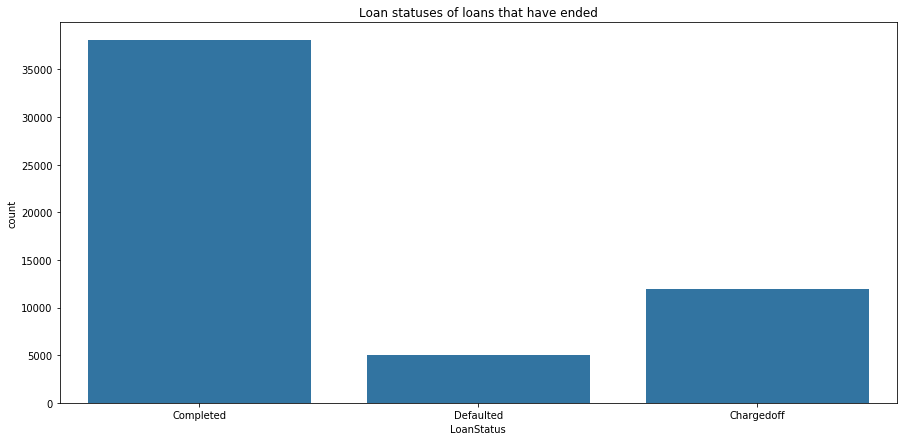

In [47]:
plt.figure(figsize=[15,7]);
sb.countplot(data=df, x='LoanStatus', color=sb.color_palette()[0]);
plt.title('Loan statuses of loans that have ended');

## Distribution of Prosper Ratings

When looking at the distribution of Prosper Ratings we can see that the most safe rating is the least popular. This could explain that almost a fourth of the loans fail to be completed. As the less risky loans are not as popular as the more risky loans.

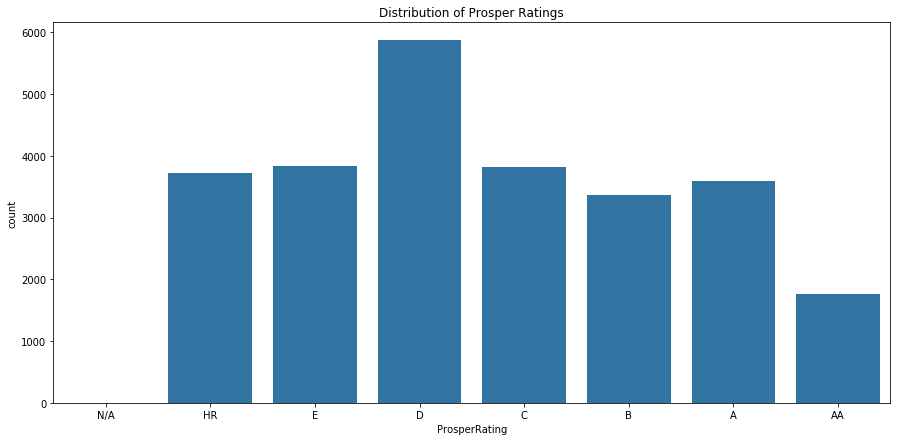

In [48]:
plt.figure(figsize=[15,7]);
sb.countplot(data=df, x='ProsperRating', color=sb.color_palette()[0]);
plt.title('Distribution of Prosper Ratings');

## Loan statuses relative for each Prosper Rating

When looking at the loan status relative for each Prosper Rating a clear pattern can be seen. As the Prosper Rating increases in quality, the relative amount of completed loans goes up, while the relative amount of failed loans goes down. If you want to increase your chance for a completed loan, choosing for a loan with a high Prosper Rating is key.

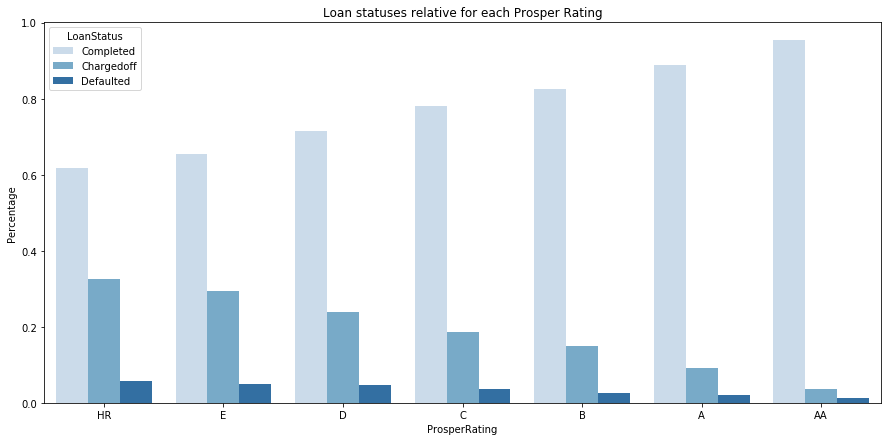

In [49]:
# For each rating, the percentage of completed, chargedoff and defaulted will be shown. Thus the total sum of each rating is 1.
ratings = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
df_ProsperRating = pd.DataFrame()
plt.figure(figsize=[15,7]);
for rating in ratings:
    temp = df[df['ProsperRating'] == rating]['LoanStatus'].value_counts(normalize=True).rename_axis('LoanStatus').reset_index(name='Percentage')
    temp['ProsperRating'] = rating
    frames = [df_ProsperRating, temp]
    df_ProsperRating = pd.concat(frames)

sb.barplot(x="ProsperRating", y="Percentage", hue="LoanStatus", data=df_ProsperRating, palette='Blues');
plt.title('Loan statuses relative for each Prosper Rating');

## Prosper Score by BorrowerRate for Selected Loan Statuses

It is clear that the upper left quadrant is the sweet spot for succesfull loans. A high Prosper Score and low BorrowerRate seem to be good ingredients for a loan that gets completed.



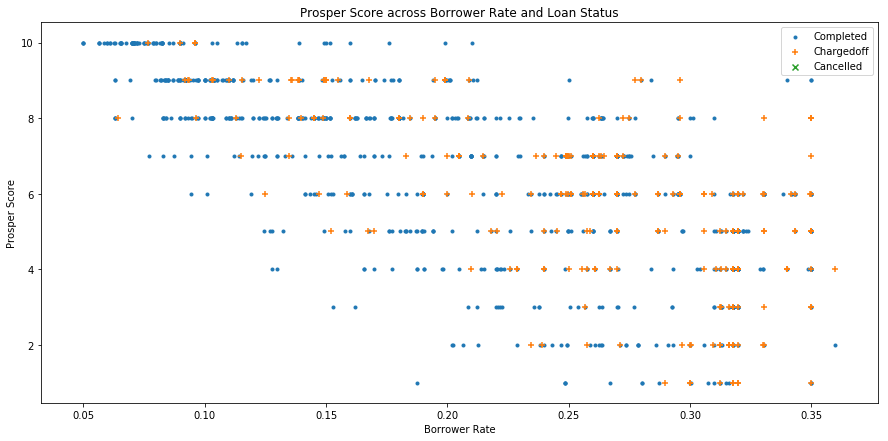

In [51]:
sample = df.sample(frac=0.05, replace=True);

markers = [['Completed', '.'], ['Chargedoff', '+'], ['Cancelled', 'x']]
plt.figure(figsize=[15,7]);
for status, marker in markers:
    df_marked = sample[sample['LoanStatus'] == status]
    plt.scatter(data = df_marked, x = 'BorrowerRate', y = 'ProsperScore', marker = marker);
plt.legend(['Completed','Chargedoff', 'Cancelled']);
plt.title('Prosper Score across Borrower Rate and Loan Status');
plt.xlabel('Borrower Rate');
plt.ylabel('Prosper Score');